In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", 200)

In [2]:
data_path = "../Data/complaints.csv"
df = pd.read_csv(data_path)
df.shape

C:\Users\HP\AppData\Local\Temp\ipykernel_7736\1900677061.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


(9609797, 18)

In [3]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [4]:
product_counts = df["Product"].value_counts()
product_counts.head(15)

Product
Credit reporting or other personal consumer reports                             4834855
Credit reporting, credit repair services, or other personal consumer reports    2163857
Debt collection                                                                  799197
Mortgage                                                                         422254
Checking or savings account                                                      291178
Credit card                                                                      226686
Credit card or prepaid card                                                      206369
Money transfer, virtual currency, or money service                               145066
Credit reporting                                                                 140429
Student loan                                                                     109717
Bank account or service                                                           86205
Vehicle loan or lease   

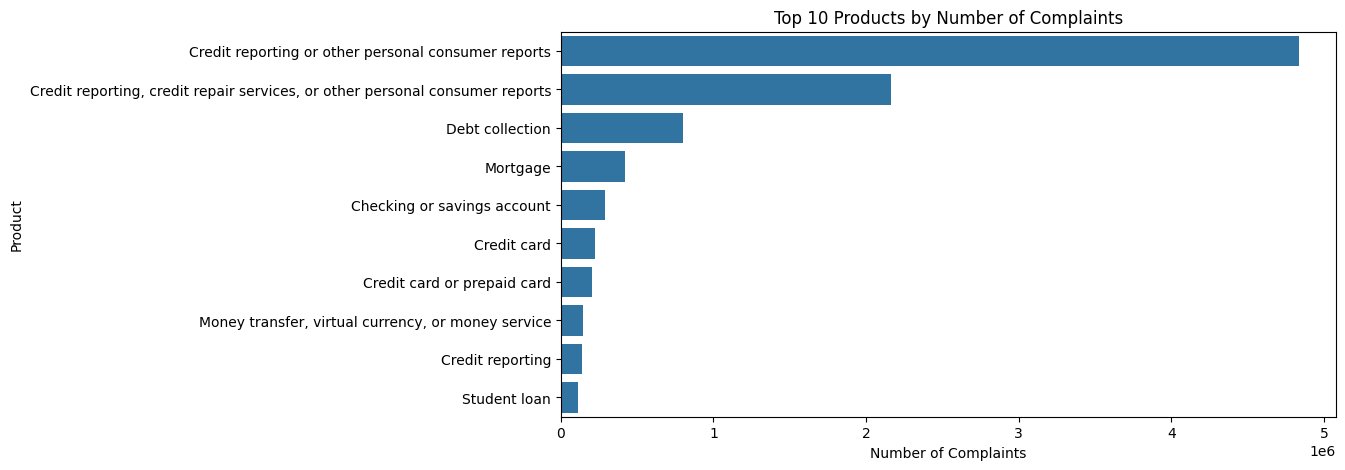

In [5]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x=product_counts.head(10).values,
    y=product_counts.head(10).index
)
plt.title("Top 10 Products by Number of Complaints")
plt.xlabel("Number of Complaints")
plt.ylabel("Product")
plt.show()

In [6]:
df["narrative_word_count"] = (
    df["Consumer complaint narrative"]
    .astype(str)
    .apply(lambda x: len(x.split()))
)

In [7]:
df["narrative_word_count"].describe()

count    9.609797e+06
mean     5.515649e+01
std      1.495169e+02
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      5.000000e+01
max      6.469000e+03
Name: narrative_word_count, dtype: float64

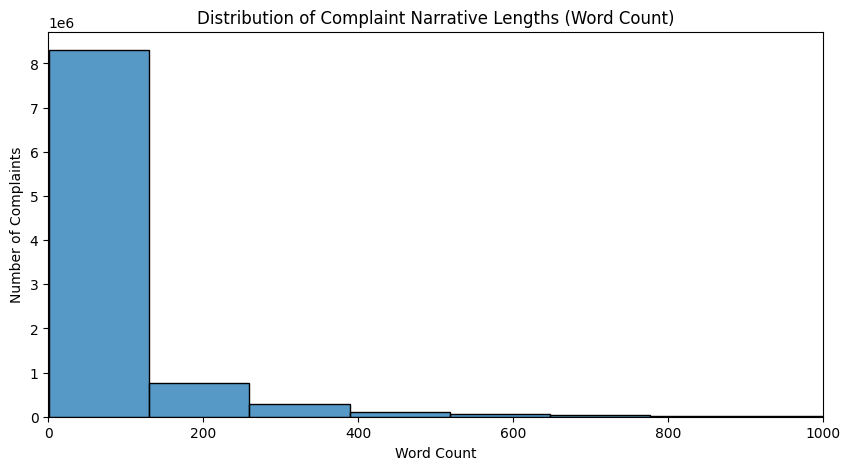

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(
    df["narrative_word_count"],
    bins=50
)
plt.title("Distribution of Complaint Narrative Lengths (Word Count)")
plt.xlabel("Word Count")
plt.ylabel("Number of Complaints")
plt.xlim(0, 1000)
plt.show()

In [9]:
total_rows = len(df)
missing_narratives = df["Consumer complaint narrative"].isna().sum()
non_missing_narratives = total_rows - missing_narratives
total_rows, missing_narratives, non_missing_narratives

(9609797, np.int64(6629041), np.int64(2980756))

In [10]:
missing_pct = (missing_narratives / total_rows) * 100
non_missing_pct = 100 - missing_pct
missing_pct, non_missing_pct

(np.float64(68.98211273349479), np.float64(31.017887266505213))

In [11]:
target_products = [
    "Credit card",
    "Credit card or prepaid card",
    "Consumer Loan",
    "Payday loan, title loan, or personal loan",
    "Payday loan, title loan, personal loan, or advance loan",
    "Checking or savings account",
    "Money transfer, virtual currency, or money service"
]
df_filtered = df[df["Product"].isin(target_products)]
df_filtered.shape

(948028, 19)

In [12]:
df_filtered = df_filtered.dropna(
    subset=["Consumer complaint narrative"]
)
df_filtered.shape

(462436, 19)

In [13]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)          
    text = re.sub(r"[^a-z\s]", " ", text)        
    text = re.sub(r"\s+", " ", text).strip()      
    return text

In [14]:
df_filtered["clean_narrative"] = (
    df_filtered["Consumer complaint narrative"]
    .astype(str)
    .apply(clean_text)
)
df_filtered[["Consumer complaint narrative", "clean_narrative"]].head()

,Consumer complaint narrative,clean_narrative
12237,A XXXX XXXX card was opened under my name by a fraudster. I received a notice from XXXX that an account was just opened under my name. I reached out to XXXX XXXX to state that this activity was u...,a xxxx xxxx card was opened under my name by a fraudster i received a notice from xxxx that an account was just opened under my name i reached out to xxxx xxxx to state that this activity was unau...
12532,I made the mistake of using my wellsfargo debit card to depsit funds Into XXXXXXXX ATM machine outside their branch. \n\nI went into the branch and was told they couldn't help and had to phone the...,i made the mistake of using my wellsfargo debit card to depsit funds into xxxxxxxx atm machine outside their branch i went into the branch and was told they couldn t help and had to phone the cust...
13280,"Dear CFPB, I have a secured credit card with citibank which is changed to unsecured card and I have been calling n waitting for the check release the secured amount {$2500.00} for rhat credit card...",dear cfpb i have a secured credit card with citibank which is changed to unsecured card and i have been calling n waitting for the check release the secured amount for rhat credit card they told m...
13506,"I have a Citi rewards cards. The credit balance issued to me was {$8400.00}. I recently moved, which meant my bills would be lowered, which meant I'd have LESS use for my credit cards. So in order...",i have a citi rewards cards the credit balance issued to me was i recently moved which meant my bills would be lowered which meant i d have less use for my credit cards so in order to keep my usag...
13955,"b'I am writing to dispute the following charges on my CITI Credit Card Accounts where I have become a victim of identity theft when someone made a purchase without my authorization, I have not mad...",b i am writing to dispute the following charges on my citi credit card accounts where i have become a victim of identity theft when someone made a purchase without my authorization i have not made...


In [15]:
output_path = "../data/processed/filtered_complaints.csv"
df_filtered.to_csv(output_path, index=False)